### Hintonらのディープビリーフネットワーク(Deep Belief Network, DBN)
それまで関心の低かったニューラルネット全般にブレークスルーをもたらした**DBN**  
一般的なニューラルネット(入力層、中間層、出力層)に似た多層構造を持つモデルで、その振る舞いは**確率的に**記述され、  
主にデータの生成モデルに用いられます。学習の仕方は、一般的なニューラルネットと異なる原理に基づいて行われるものの、多層化していくと  
DBNの学習は難しくなっていきます(過学習・過適合、勾配消失問題...etc)

### 制約ボルツマンマシン(Re-stricted Boltzmann Machine, RBM)
これらの問題をHintonらは、まず層ごとに**制約ボルツマンマシン**と呼ばれる単層ネットワークに分解した上で、**貪欲法(greedy method/algorism)**  
の考え方に従って、これらのRMBを入力層に近い側から順番に教師なしで学習していく方法を考えました。  
そしてこの方法によって、DBNの学習がうまくいくことを示しました。  
  
さらには、このRBMを利用したDBNは、**一般的な順伝搬型のニューラルネットに転換することが可能**となり、得られたニューラルネットは、  
多層であっても過学習や過適合を起こさずに学習することができました。  
事前に学習する前に、各層ごとに最適なパラメータを、程よい初期値を決めておくことを**事前学習(Pre-training)**といいます。

### 事前学習に使われる、自己符号化器(Auto-Encoder)
DBNやRBMだけでなく、**自己符号化器**を用いることで、多層ネットワークの事前学習ができます。  
自己符号化器は、入力に対して計算される出力が、その入力データをよく表す特徴を抽出してくれるニューラルネットです。  
目標の出力は入力そのものの表現(特徴抽出)であり、従ってその学習自体は、**教師なし学習**で行われます。  

**特徴量の学習**  
画像や音声などの自然界のデータは、一般的に高次元かつ大規模な空間を形成していますが、その空間に満遍なく存在しているわけではなく  
何かしら偏在しているはずです。(例えば自然風景の画像は、当然白黒の2値画像とは異なり、また森林の画像であれば、緑の色彩に溢れた**偏り**  
のある画像になっているはずです)  
多層ニューラルネットは、これら偏りのある画像から切り出したパッチ(小領域)の集合を対象に、**スパース符号化**(sparse coding)によって  
辞書(基底)の学習を行うこと、これを基本としています。  
例えば、[Leeらは、自然画像のパッチを２層以上のネットワーク(RBM)を重ねたもので学習させると、霊長類の視覚視野のV2領域に見られると  
される特徴に類似した特徴が得られることが報告](https://core.ac.uk/download/pdf/22879338.pdf)されています。  
  
また[畳み込みニューラルネットの構造を組み込んだDBNを使い、事物を写した自然画像を学習させると画像の特徴が各層と対応して、階層性を伴う  
形で学習されることも報告](http://www.robotics.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf)されています。

**多層ニューラルネットの有効性**が確かめられ、それまでの深層学習以前の精度を深層学習が向上させ続けた結果、広く認知されました。  
ただし、深層学習と一言で言っても、実際にはいくつも異なる方法論があり、問題に応じてそれらを使い分けていくのが一般的です。

### 順伝搬型ニューラルネットワーク
順伝搬型ニューラルネットワーク(feed forword neural network)は、層状に並べたユニットが隣接層間でのみ結合した構造をもち、  
情報(データ)が、入力側から出力側へ**一方向にのみ**伝搬するニューラルネットワークです。  
順伝搬型ニューラルネットワークは別名、**多層パーセプトロン**(multi-layer perceptron)と呼ばれます。

In [2]:
# -*- coding: utf-8 -*-
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
# MNIST データセットを取り込む
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [5]:
# 変換前：28 x 28 の2次元配列 x 60,000
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [7]:
import matplotlib.pyplot as plt

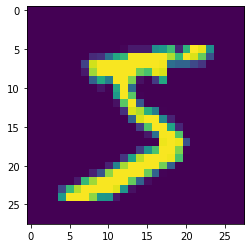

In [8]:
# 画像データの可視化
# 画像表示の準備
fig = plt.figure()
ax = fig.add_subplot(111)

# 1枚目の画像表示
plt.imshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
# 28*28の２次元配列を、784要素の1次元配列に変換する＆256階調を[0, 1]に正規化
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test  = X_test.reshape(10000, 784).astype('float32') / 255

In [11]:
type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [12]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [13]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
# 0~9の数字を、10次元で表現する
y_train_array = np_utils.to_categorical(y_train, 10)
y_test_array  = np_utils.to_categorical(y_test, 10)

In [17]:
y_train_array.shape, y_test_array.shape

((60000, 10), (10000, 10))

In [18]:
# モデルの箱(空箱)
model_non_drop_out = Sequential()

# 入力層
# - ノード数：512
# - 入力：784次元
# - 活性化関数：relu
model_non_drop_out.add(Dense(512, input_dim=784))
model_non_drop_out.add(Activation('relu'))

# 隠れ層
# - ノード数：512
# - 活性化関数：relu
model_non_drop_out.add(Dense(512))
model_non_drop_out.add(Activation('relu'))

# 出力層
# - ノード数：10
# - 活性化関数：softmax
model_non_drop_out.add(Dense(10))
model_non_drop_out.add(Activation('softmax'))

# モデルの要約を出力
model_non_drop_out.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

**ソフトマックス関数**  
ソフトマックス関数は多くの場合、出力層でのみ使用されますが、RBFネットワークでは中間層にも適用されます。  
シグモイド関数がある一つの値(実数値)の入力に対して出力を行った関数であるのに対して、ソフトマックス関数は  
複数値(多値問題で使いやすい)からなるベクトルを入力し、それを正規化したベクトルを出力します。

In [19]:
# 学習過程の設定
# - 目的関数：categorical_crossentropy
# - 最適化アルゴリズム：rmsprop
model_non_drop_out.compile(loss='categorical_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])

In [21]:
# 学習
# - バッチサイズ：128
# - 学習の繰り返し回数：20
model_non_drop_out.fit(X_train, y_train_array,
                       batch_size=128,
                       epochs=20,
                       verbose=1,
                       validation_data=(X_test, y_test_array))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0715 - accuracy: 0.9777 - val_loss: 0.0719 - val_accuracy: 0.9784
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0737 - val_accuracy: 0.9794
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0821 - val_accuracy: 0.9790
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0855 - val_accuracy: 0.9790
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0937 - val_accuracy: 0.9802
Epoch 6/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0810 - val_accuracy: 0.9812
Epoch 7/20
60000/60000 [==============================] - 7s 1

In [22]:
# 評価
score = model_non_drop_out.evaluate(X_test, y_test_array, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.20233450886981968
Test accuracy : 0.9800999760627747
